# Global Risk Modeling

GOAL: 
- I want to be able to develope a machine learning model to quantify a countries stability based on several quantifiable variables.

PROBLEM: 
- Which variables should I include and where can I get the data? 
- What do I mean by "stability"?

In future I would like to retain gini coefficient 

In [43]:
#pip install cairosvg
#pip install cffi #cairocff
#pip install -i https://pypi.anaconda.org/t/$TOKEN/rmg/simple cairocffi

SyntaxError: invalid syntax (Temp/ipykernel_8692/3035467704.py, line 1)

In [125]:
# import necessary libraries
import pandas as pd
import os
import glob
import re
from string import digits
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from functools import reduce
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from pygal.style import Style
import pygal.maps.world as pgw
from pygal.maps.world import World
import pygal
import matplotlib.pyplot as plt

#import cairosvg

# useful

#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)

In [126]:
# making a template for dataframe
t = pd.read_table("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\WFB Arch\\2020\\rawdata_196.txt")

for i in t:
    t[i] = t[i].str.lstrip(digits)
    t["name"] = t[i].str[:50].str.strip()

    tem = t["name"]   
tem = pd.DataFrame(tem)
#tem.set_index("name", inplace=True)
# creates a dataframe with country names as a template for merging

In [127]:
# getting text files for 2020
pd.set_option('display.max_columns', None)
path = "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\WFB Arch\\2020"
txt_files_2020 = glob.glob(os.path.join(path, "*.txt"))

tem_2020 = tem
# loop over the list of csv files
for f in txt_files_2020:
    test = pd.read_table(f)
    for i in test:
        test[i] = test[i].str.lstrip(digits) # gets rid of rank
        test["name"] = test[i].str[:50].str.strip()     # creates name 
        test[test.columns[0]] = test[i].str[50:]
    tem_2020 = pd.merge(tem_2020,test, on = "name", how = "outer")
tem_2020 = tem_2020.iloc[:200,:] 



#tem_2020["Country Comparison :: GDP real growth rate"] = tem_2020["Country Comparison :: GDP real growth rate"].str[:-9]

# [:,5:18]
att=tem_2020.iloc[:,5:18]
for (name, data) in att.iteritems():
    att[name] = data.str[:-9]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
    att[name]= (data.replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
tem_2020.iloc[:,5:18] = att

# [:,20:32]
att=tem_2020.iloc[:,20:32]
for (name, data) in att.iteritems():
    att[name] = data.str[:-9]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
    att[name]= (data.replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
tem_2020.iloc[:,20:32] = att

# [:, 33:41]
att=tem_2020.iloc[:, 33:41]
for (name, data) in att.iteritems():
    att[name] = data.str[:-9]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
    att[name]= (data.replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
tem_2020.iloc[:, 33:41] = att

# [:, 47:52]
att=tem_2020.iloc[:, 47:52]
for (name, data) in att.iteritems():
    att[name] = data.str[:-9]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
    att[name]= (data.replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
tem_2020.iloc[:, 47:52] = att

# [:, 54:58]
att=tem_2020.iloc[:, 54:58]
for (name, data) in att.iteritems():
    att[name] = data.str[:-9]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
    att[name]= (data.replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
tem_2020.iloc[:, 54:58] = att

# Country Comparison :: Carbon dioxide emissions from consumption of energy
tem_2020["Country Comparison :: Carbon dioxide emissions from consumption of energy"] = tem_2020["Country Comparison :: Carbon dioxide emissions from consumption of energy"].str[:-9]

# [:, 18:20]
att=tem_2020.iloc[:, 18:20]
for (name, data) in att.iteritems():
    att[name] = data.str[:-9]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .$')
    att[name] = data.str[:-2]
#    att[name]= (data.replace( '[\$,)]','', regex=True )
#               .replace( '[(]','-',   regex=True ).astype(float))
tem_2020.iloc[:, 18:20] = att



# "Country Comparison :: Crude oil - proved reserves"
tem_2020["Country Comparison :: Crude oil - proved reserves"] = tem_2020["Country Comparison :: Crude oil - proved reserves"].str[:-17]

tem_2020

# "Country Comparison :: Population"
tem_2020["Country Comparison :: Population"] = tem_2020["Country Comparison :: Population"].str[:-18]

# Country Comparison :: Natural gas - proved reserve
tem_2020["Country Comparison :: Natural gas - proved reserves"] = tem_2020["Country Comparison :: Natural gas - proved reserves"].str[:-14]

# Country Comparison :: Roadways
tem_2020["Country Comparison :: Roadways"] = tem_2020["Country Comparison :: Roadways"].str[:-6]

# Ugly fix for Somalia "800" (note this missassignes a gdp per capita to a country thtat is later dropped)
tem_2020["Country Comparison :: GDP - per capita (PPP)"].fillna(value =800, inplace = True)

# Creating GDP
tem_2020["Country Comparison :: Population"] = tem_2020["Country Comparison :: Population"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
tem_2020["Country Comparison :: GDP (purchasing power parity)"]= tem_2020["Country Comparison :: GDP - per capita (PPP)"]* tem_2020["Country Comparison :: Population"]

# Country Comparison :: Natural gas - proved reserves
tem_2020["Country Comparison :: Natural gas - proved reserves"] = tem_2020["Country Comparison :: Natural gas - proved reserves"].str[:-6]

# Fixing "Country Comparison :: Median age"
tem_2020["Country Comparison :: Median age"] = tem_2020["Country Comparison :: Median age"].str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .$')

# Fixing Country Comparison :: Obesity - adult prevalence rate
tem_2020["Country Comparison :: Obesity - adult prevalence rate"] = tem_2020["Country Comparison :: Obesity - adult prevalence rate"].str[:-4]

# Fixing Country Comparison :: Waterways
tem_2020["Country Comparison :: Waterways"] = tem_2020["Country Comparison :: Waterways"].str[:-4]

# Country Comparison :: Airports has date at end 2020
tem_2020["Country Comparison :: Airports"] = tem_2020["Country Comparison :: Airports"].str[:-4]

# Country Comparison :: Railways has date at end 2020
tem_2020["Country Comparison :: Railways"] = tem_2020["Country Comparison :: Railways"].str[:-4]


# fragility index 2020
frag_2020 = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\fsi-2020.csv") #,encoding = 'latin1'
frag_2020 = frag_2020[["Country","Year","Total"]]
frag_2020 = frag_2020.iloc[0:200,:]
frag_2020 = frag_2020.dropna()
frag_2020 = pd.DataFrame(frag_2020)
frag_2020 = frag_2020.rename(columns={"Country":"name"})

# No Roads
tem_2020.iloc[85,64] = 17400
tem_2020.iloc[65,64] = 1000

#dataframe 
df_2020 = pd.merge(frag_2020,tem_2020,on=["name"], how='inner')

df_2020 = df_2020.rename(columns={"Total":"Instability_Num"})

# fragility index 2020
frag_2020 = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\fsi-2020.csv") #,encoding = 'latin1'
frag_2020 = frag_2020[["Country","Year","Total"]]
frag_2020 = frag_2020.iloc[0:200,:]
frag_2020 = frag_2020.dropna()
frag_2020 = pd.DataFrame(frag_2020)
frag_2020 = frag_2020.rename(columns={"Country":"name"})

# No Roads
tem_2020.iloc[85,64] = 17400
tem_2020.iloc[65,64] = 1000

#dataframe 
df_2020 = pd.merge(frag_2020,tem_2020,on=["name"], how='inner')

df_2020 = df_2020.rename(columns={"Total":"Instability_Num"})


In [128]:
# getting text files for 2019
################ This has 10 extra columns on financials #########################################
pd.set_option('display.max_columns', None)
path = "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\WFB Arch\\2019"
txt_files_2019 = glob.glob(os.path.join(path, "*.txt"))
tem_2019 = tem

# loop over the list of csv files
for f in txt_files_2019:
    test = pd.read_table(f)
    for i in test:
        test[i] = test[i].str.lstrip(digits) # gets rid of rank
        test["name"] = test[i].str[:50].str.strip()     # creates name 
        test[test.columns[0]] = test[i].str[50:]
    tem_2019 = pd.merge(tem_2019,test, on = "name", how = "outer")
tem_2019 = tem_2019.iloc[:200,:] 





# 2019 data processing 


# Remove letters
att=tem_2019.iloc[:,1:]
for (name, data) in att.iteritems():
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .$')   
tem_2019.iloc[:,1:] = att

# Remove dates [:,5:52]
att=tem_2019.iloc[:,5:52]
for (name, data) in att.iteritems():
    att[name] = data.str[:-5]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
tem_2019.iloc[:,5:52] = att

# Remove dates [:,17:22]
att=tem_2019.iloc[:,17:22]
for (name, data) in att.iteritems():
    att[name] = data.str[:-2]   
tem_2019.iloc[:,17:22] = att

# "Country Comparison :: Market value of publicly traded shares"
tem_2019.iloc[1:,22] = tem_2019.iloc[1:,22].str[:-3]

# Remove dates [:,26:30]
att=tem_2019.iloc[:,26:30]
for (name, data) in att.iteritems():
    att[name] = data.str[:-5]   
tem_2019.iloc[:,26:30] = att

# 42 : "Country Comparison :: Crude oil - proved reserves"
tem_2019["Country Comparison :: Crude oil - proved reserves"] = tem_2019["Country Comparison :: Crude oil - proved reserves"].str[:-1]

# 51 : "Country Comparison :: Natural gas - proved reserves"
tem_2019["Country Comparison :: Natural gas - proved reserves"] = tem_2019["Country Comparison :: Natural gas - proved reserves"].str[:-1]

# 52 : Country Comparison :: Carbon dioxide emissions from consumption of energy
tem_2019["Country Comparison :: Carbon dioxide emissions from consumption of energy"] = tem_2019["Country Comparison :: Carbon dioxide emissions from consumption of energy"].str[:-4]

# Fix Afganistan
tem_2019.iloc[132,1] = tem_2019.iloc[132,1][:-5].strip()
    
# Remove Dates [:,54:70]
att=tem_2019.iloc[:,54:71]
for (name, data) in att.iteritems():
    att[name] = data.str[:-4]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
tem_2019.iloc[:,54:71] = att

# Remove Dates [:,73:76]
att=tem_2019.iloc[:,73:76]
for (name, data) in att.iteritems():
    att[name] = data.str[:-4]
tem_2019.iloc[:,73:76] = att

# Remove Date "Country Comparison :: Airports"
tem_2019["Country Comparison :: Airports"] = tem_2019["Country Comparison :: Airports"].str[:-4]

# GDP as float
tem_2019.rename(columns= {"Country Comparison :: GDP - real growth rate":"Country Comparison :: GDP real growth rate"}, inplace = True)

# # Creating GDP
tem_2019["Country Comparison :: Population"] = tem_2019["Country Comparison :: Population"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
tem_2019["Country Comparison :: GDP - per capita (PPP)"] = tem_2019["Country Comparison :: GDP - per capita (PPP)"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
tem_2019["Country Comparison :: GDP (purchasing power parity)"]= tem_2019["Country Comparison :: GDP - per capita (PPP)"]* tem_2019["Country Comparison :: Population"]

# Ugly fix for Somalia "800" (note this missassignes a gdp per capita to a country thtat is later dropped)
tem_2019["Country Comparison :: GDP - per capita (PPP)"].fillna(value =800, inplace = True)

# fragility index 2019
frag_2019 = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\fsi-2019.csv") #,encoding = 'latin1'
frag_2019 = frag_2019[["Country","Year","Total"]]
frag_2019 = frag_2019.iloc[0:200,:]
frag_2019 = frag_2019.dropna()
frag_2019 = pd.DataFrame(frag_2019)
frag_2019 = frag_2019.rename(columns={"Country":"name"})

# No Roads
tem_2019.iloc[85,74] = 17400
tem_2019.iloc[65,74] = 1000

#Merger
df_2019 = pd.merge(frag_2019,tem_2019,on=["name"], how='inner')

df_2019 = df_2019.rename(columns={"Total":"Instability_Num"})



In [129]:
# getting text files for 2018
################ This has 10 extra columns on financials #########################################
pd.set_option('display.max_columns', None)
path = "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\WFB Arch\\2018"
txt_files_2018 = glob.glob(os.path.join(path, "*.txt"))
tem_2018 = tem

# loop over the list of csv files
for f in txt_files_2018:
    test = pd.read_table(f)
    for i in test:
        test[i] = test[i].str.lstrip(digits) # gets rid of rank
        test["name"] = test[i].str[:50].str.strip()     # creates name 
        test[test.columns[0]] = test[i].str[50:]
    tem_2018 = pd.merge(tem_2018,test, on = "name", how = "outer")
tem_2018 = tem_2018.iloc[:200,:] 




# Remove letters
att=tem_2018.iloc[:,1:]
for (name, data) in att.iteritems():
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .$')   
tem_2018.iloc[:,1:] = att

# Remove dates [:,5:52]
att=tem_2018.iloc[:,1:52]
for (name, data) in att.iteritems():
    att[name] = data.str[:-5]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
tem_2018.iloc[:,1:52] = att

# Remove dates [:,17:23]
att=tem_2018.iloc[:,17:22]
for (name, data) in att.iteritems():
    att[name] = data.str[:-2]   
tem_2018.iloc[:,17:22] = att

# "Country Comparison :: Market value of publicly traded shares"
tem_2018.iloc[1:,22] = tem_2018.iloc[1:,22].str[:-3]

# Remove dates [:,26:30]
att=tem_2018.iloc[:,26:30]
for (name, data) in att.iteritems():
    att[name] = data.str[:-5]   
tem_2018.iloc[:,26:30] = att

# 42 : "Country Comparison :: Crude oil - proved reserves"
tem_2018["Country Comparison :: Crude oil - proved reserves"] = tem_2018["Country Comparison :: Crude oil - proved reserves"].str[:-1]

# 51 : "Country Comparison :: Natural gas - proved reserves"
tem_2018["Country Comparison :: Natural gas - proved reserves"] = tem_2018["Country Comparison :: Natural gas - proved reserves"].str[:-1]

# 52 : Country Comparison :: Carbon dioxide emissions from consumption of energy
tem_2018["Country Comparison :: Carbon dioxide emissions from consumption of energy"] = tem_2018["Country Comparison :: Carbon dioxide emissions from consumption of energy"].str[:-4]

#53
tem_2018.iloc[1,53] = tem_2018.iloc[1,53][:-4]

# 55
# Remove dates [:,55]
att=tem_2018.iloc[:,54:56]
for (name, data) in att.iteritems():
    att[name] = data.str[:-5]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
tem_2018.iloc[:,54:56] = att

# 57
# Remove dates [:,57]
att=tem_2018.iloc[:,57:]
for (name, data) in att.iteritems():
    att[name] = data.str[:-5]
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
tem_2018.iloc[:,57:] = att


tem_2018.rename(columns= {"Country Comparison :: GDP - real growth rate":"Country Comparison :: GDP real growth rate"}, inplace = True)
tem_2018


#pop as float
tem_2018["Country Comparison :: Population"] = tem_2018["Country Comparison :: Population"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

# labor as float Country Comparison :: Labor force
tem_2018["Country Comparison :: Labor force"] = tem_2018["Country Comparison :: Labor force"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

# as float Country Comparison :: GDP - per capita (PPP)
tem_2018["Country Comparison :: GDP - per capita (PPP)"] = tem_2018["Country Comparison :: GDP - per capita (PPP)"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)



# fragility index 2018
frag_2018 = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\fsi-2018.csv") #,encoding = 'latin1'
frag_2018 = frag_2018[["Country","Year","Total"]]
frag_2018 = frag_2018.iloc[0:200,:]
frag_2018 = frag_2018.dropna()
frag_2018 = pd.DataFrame(frag_2018)
frag_2018 = frag_2018.rename(columns={"Country":"name"})

#Merger
df_2018 = pd.merge(frag_2018,tem_2018,on=["name"], how='inner')

df_2018 = df_2018.rename(columns={"Total":"Instability_Num"})


In [130]:
# concatinating the different years

frames = [df_2020, df_2019, df_2018]
df = pd.concat(frames, keys=['2020', '2019', '2018'])

df = df.rename(columns={"name":"Country"})

#df_G = df[["Country","Country Comparison :: Distribution of family income - Gini index"]]

df = df.loc[:, ~df.columns.isin(['Country Comparison :: Health expenditures', 
                                 'Country Comparison :: Stock of direct foreign investment - abroad', 
                                 "Country Comparison :: Stock of direct foreign investment - at home",
                                 "Country Comparison :: Market value of publicly traded shares", 
                                 "Country Comparison :: Stock of domestic credit",
                                "Country Comparison :: Stock of broad money",
                                "Country Comparison :: Stock of narrow money",
                                "Country Comparison :: Commercial bank prime lending rate",
                                "Country Comparison :: Central bank discount rate",
                                "Country Comparison :: Distribution of family income - Gini index"])]

# Fixing waterways 
df["Country Comparison :: Waterways"].fillna(value = 0, inplace = True)

#Fixing rail roads
df["Country Comparison :: Railways"].fillna(value = 0, inplace = True)

#Fixing Merchant Marine
df["Country Comparison :: Merchant marine"].fillna(value = 0, inplace = True)

# Fixing Oil
df["Country Comparison :: Crude oil - proved reserves"] = df["Country Comparison :: Crude oil - proved reserves"].str[:-2]

# Filling Roads
df["Country Comparison :: Roadways"].fillna(value = 0, inplace = True)

# Uggly fix for samoa and Somalia
df["Country Comparison :: Gross national saving"].fillna(value = 0, inplace = True)

# Country Comparison :: Natural gas - proved reserves
df["Country Comparison :: Natural gas - proved reserves"].fillna(value = 0, inplace = True)


df= df.drop(["Country Comparison :: Children under the age of 5 years underweight", 
             "Country Comparison :: Education expenditures", "Country Comparison :: Unemployment, youth ages 15-24",
            "Country Comparison :: HIV/AIDS - deaths", "Country Comparison :: Military expenditures"], axis=1)

# Cleaning hold out dates
df.iloc[222,5:6] = df.iloc[222,5:6].str[:-5]
df.iloc[158,6:7] = df.iloc[158,6:7].str[:-5]

df.iloc[31,43]  = 0
df.iloc[69,43]  = 0
df.iloc[93,43]  = 0
df.iloc[103,43]  = 0
df.iloc[122,43]  = 0
df.iloc[126,43]  = 0
df.iloc[125,43]  = 0
df.iloc[131,43]  = 0
df.iloc[189,43]  = 0
df.iloc[219,43]  = 0
df.iloc[246,43]  = 0
df.iloc[259,43]  = 0
df.iloc[279,43]  = 0
df.iloc[284,43]  = 0
df.iloc[279,43]  = 0
df.iloc[275,43]  = 0
df.iloc[343,43]  = 0
df.iloc[373,43]  = 0
df.iloc[402,43]  = 0
df.iloc[417,43]  = 0
df.iloc[433,43]  = 0
df.iloc[430,43]  = 0
df.iloc[439,43]  = 0
df.iloc[0,47:48] = df.iloc[0,47:48].str[:-5]

#not run
# making floats
# this works
att=df.iloc[:,3:7]
for (name, data) in att.iteritems():
    att[name] = data.str.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .')
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[:,3:7] = att

#
att=df.iloc[:154,20:22]
for (name, data) in att.iteritems():
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[:154,20:22] = att

#
att=df.iloc[154:,17:25]
for (name, data) in att.iteritems():
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[154:,17:25] = att

#
att=df.iloc[154:,31:34]
for (name, data) in att.iteritems():
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[154:,31:34] = att

#
df.iloc[:154,34]=df.iloc[:154,34].replace( '[\$,)]','', regex=True ).astype(float)

#
att=df.iloc[154:,34:44]
for (name, data) in att.iteritems():
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[154:,34:44] = att

# 
df["Country Comparison :: Area"]=df["Country Comparison :: Area"].replace( '[\$,)]','', regex=True ).astype(float)

df.iloc[164,54] = np.NaN
#
df.iloc[:319,54] = np.NaN
#
df.iloc[450:,60] = np.NaN
#
df.iloc[392,63] = np.NaN
#
att=df.iloc[:,44:]
for (name, data) in att.iteritems():
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[:,44:] = att

############ 46 is already float
df["Country Comparison :: Railways"].fillna(value = 0, inplace = True)
df["Country Comparison :: Merchant marine"].fillna(value = 0, inplace = True)

df = df.drop(["Country Comparison :: Life expectancy at birth", "Country Comparison :: HIV/AIDS - people living with HIV/AIDS",
        "Country Comparison :: HIV/AIDS - adult prevalence rate"], axis = 1)

# make everything a float
att=df.iloc[:,3:]
for (name, data) in att.iteritems():
    att[name]= (data.replace( '[\$,)]','', regex=True ).astype(float))
df.iloc[:,3:] = att

# Drop NaN
df_1 = df.dropna()

df_2 = df_1

In [131]:
# Commodities (Wheat and Energy) : GDP per cap
# https://www.macrotrends.net/2534/wheat-prices-historical-chart-data
# Wheat 2022 	$9.5829
# Wheat 20212021 	$7.0402
# Oil 2022 	$96.02
# Oil 2021 	$68.17
# Gas 2022 	$6.53
# Gas 2021 	$3.89


#df_2["Wheat:GDPpc"] = []
#df_2["Oil:GDPpc"] = []
#df_2["NatGas:GDPpc"] = []

for r in df_2["Year"]:
    if r == 2020.0:
        df_2["Wheat:GDPpc"] = 5.4980/df_2["Country Comparison :: GDP - per capita (PPP)"]
        df_2["Oil:GDPpc"] = 39.68/df_2["Country Comparison :: GDP - per capita (PPP)"]
        df_2["NatGas:GDPpc"] = 2.03/df_2["Country Comparison :: GDP - per capita (PPP)"]
    elif r == 2019.0:
        df_2["Wheat:GDPpc"] = 4.9414/df_2["Country Comparison :: GDP - per capita (PPP)"]
        df_2["Oil:GDPpc"] = 56.99/df_2["Country Comparison :: GDP - per capita (PPP)"]
        df_2["NatGas:GDPpc"] = 2.56/df_2["Country Comparison :: GDP - per capita (PPP)"]
    elif r == 2018.0:
        df_2["Wheat:GDPpc"] = 4.9757/df_2["Country Comparison :: GDP - per capita (PPP)"]
        df_2["Oil:GDPpc"] = 65.23/df_2["Country Comparison :: GDP - per capita (PPP)"]
        df_2["NatGas:GDPpc"] = 3.15/df_2["Country Comparison :: GDP - per capita (PPP)"]


C:\Users\Ian\AppData\Local\Temp/ipykernel_23248/2183463114.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Wheat:GDPpc"] = 5.4980/df_2["Country Comparison :: GDP - per capita (PPP)"]
C:\Users\Ian\AppData\Local\Temp/ipykernel_23248/2183463114.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Oil:GDPpc"] = 39.68/df_2["Country Comparison :: GDP - per capita (PPP)"]
C:\Users\Ian\AppData\Local\Temp/ipykernel_23248/2183463114.py:19: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [132]:
# Quintile (preforming better..)
result = []
for i in df_2["Instability_Num"]:
    if i >100:
        result.append(5)
    elif i>75:
         result.append(4)
    elif i>50:
         result.append(3)
    elif i>25:
         result.append(2)
    elif i>0:
         result.append(1)
df_2["Instability"] = result 


   

C:\Users\Ian\AppData\Local\Temp/ipykernel_23248/1808068478.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Instability"] = result


In [1772]:
# Trying 3 categories 
# slightly higher accuracy
#result = []
#for i in df_2["Instability_Num"]:
#    if i >80:
#        result.append(3)
#    elif i>40:
#         result.append(2)
#    elif i>0:
#        result.append(1)

#df_2["Instability"] = result 
 

C:\Users\Ian\AppData\Local\Temp/ipykernel_32664/3031239925.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Instability"] = result


In [159]:
#df_2= df_2[["Country", "Year", "Instability_Num","Wheat:GDPpc", "Oil:GDPpc", "NatGas:GDPpc", "Country Comparison :: Telephones - fixed lines", "Country Comparison :: Telephones - mobile cellular", "Country Comparison :: Internet users", "Country Comparison :: Broadband - fixed subscriptions", "Country Comparison :: GDP real growth rate", "Country Comparison :: GDP - per capita (PPP)", "Country Comparison :: Gross national saving", "Country Comparison :: Industrial production growth rate", "Country Comparison :: Labor force", "Country Comparison :: Unemployment rate", "Country Comparison :: Taxes and other revenues", "Country Comparison :: Budget surplus (+) or deficit (-)", "Country Comparison :: Public debt", "Country Comparison :: Inflation rate (consumer prices)", "Country Comparison :: Current account balance", "Country Comparison :: Exports", "Country Comparison :: Imports", "Country Comparison :: Reserves of foreign exchange and gold", "Country Comparison :: Debt - external", "Country Comparison :: Electricity - production", "Country Comparison :: Electricity - consumption", "Country Comparison :: Electricity - exports", "Country Comparison :: Electricity - imports", "Country Comparison :: Electricity - installed generating capacity", "Country Comparison :: Electricity - from fossil fuels", "Country Comparison :: Electricity - from nuclear fuels", "Country Comparison :: Electricity - from hydroelectric plants", "Country Comparison :: Electricity - from other renewable sources", "Country Comparison :: Crude oil - production", "Country Comparison :: Crude oil - exports", "Country Comparison :: Crude oil - imports", "Country Comparison :: Crude oil - proved reserves", "Country Comparison :: Refined petroleum products - production", "Country Comparison :: Refined petroleum products - consumption", "Country Comparison :: Refined petroleum products - exports", "Country Comparison :: Refined petroleum products - imports", "Country Comparison :: Natural gas - production", "Country Comparison :: Natural gas - consumption", "Country Comparison :: Natural gas - exports", "Country Comparison :: Natural gas - imports", "Country Comparison :: Natural gas - proved reserves", "Country Comparison :: Carbon dioxide emissions from consumption of energy", "Country Comparison :: Area", "Country Comparison :: Population", "Country Comparison :: Median age", "Country Comparison :: Population growth rate", "Country Comparison :: Birth rate", "Country Comparison :: Death rate", "Country Comparison :: Net migration rate", "Country Comparison :: Maternal mortality rate", "Country Comparison :: Infant mortality rate", "Country Comparison :: Total fertility rate", "Country Comparison :: Obesity - adult prevalence rate", "Country Comparison :: Airports", "Country Comparison :: Railways", "Country Comparison :: Roadways", "Country Comparison :: Waterways", "Country Comparison :: Merchant marine", "Country Comparison :: GDP (purchasing power parity)",  "Instability"]]

df_2.iloc[:, 3:65]

Country Comparison :: Telephones - fixed lines  \
2020 0              1253287.0                              
     2              3097164.0                              
     3               141922.0                              
     4               125232.0                              
     5               258419.0                              
     7               966035.0                              
     8               146075.0                              
     9               227831.0                              
     10             2678046.0                              
     11              116882.0                              
     12              116352.0                              
     13             1618511.0                              
     14             1095946.0                              
     15              184065.0                              
     16             2607495.0                              
     17               61575.0                              
     18             5501135.0                              
     19               68072.0                              
     20                8394.0                              
     21              284799.0                              
     22               53742.0                              
     23              122566.0                              
     24               11215.0                              
     25             8885103.0                              
     26               75066.0                              
     27               45311.0                              
     28             1433460.0                              
     29              752547.0                              
     30               91422.0                              
     31               14357.0                              
     32            29330454.0                              
     33                6779.0                              
     34               34671.0                              
     35              855926.0                              
     36              133593.0                              
     37             2641982.0                              
     38                9840.0                              
     39             4140108.0                              
     40               56749.0                              
     42               68426.0                              
     43             1894179.0                              
     44            11283768.0                              
     45                7865.0                              
     46               74081.0                              
     47              215055.0                              
     48             1526232.0                              
     49              458696.0                              
     50             6774363.0                              
     51              471090.0                              
     52              375576.0                              
     53            20198012.0                              
     54              719399.0                              
     55             4558502.0                              
     56              195288.0                              
     57             3262896.0                              
     58            33585164.0                              
     59            31171043.0                              
     60               37305.0                              
     61             1686316.0                              
     62             1982934.0                              
     63              638092.0                              
     64             2580166.0                              
     65              920407.0                              
     66             1934778.0                              
     67           185097221.0                              
     68               80650.0                     

In [133]:
#TTS
# mymodel.predict(inputs)
X = df_2.iloc[:, 3:62] 
y = df_2["Instability"]

# Split the dataset
X_train, X_test, y_train, y_test = tts(X, y, train_size=.75)

In [11]:
# K-fold Ridge

#data = df_1.values
X, y = df_2.iloc[:, 3:62] , df_2["Instability"]
# define model
model = Ridge(normalize=True)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('R-Squared: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R-Squared: 0.635
Config: {'alpha': 0.025}


In [12]:
# Ridge Regression

ridge = Ridge(normalize=True,alpha=0.025)

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

# you should use cross validation on this 

# the error message is telling you that there are two values that are very similar

0.7913037327865692

In [ ]:
# Mean MAE: 0.006 (0.001)

In [22]:
# K- Fold LASSO

#data = df_2.values
X, y = df_2.iloc[:, 3:62] , df_2["Instability"]
# define model
model = Lasso(normalize=True)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('R-Squared: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.750
Config: {'alpha': 0.001}


In [12]:
#importing lasso

lasso = Lasso(alpha = 0.001) # bes alpha for df_2

# training data
lasso.fit(X_train, y_train) 

# R^2
lasso.score(X_test,y_test)
round(lasso.score(X_test,y_test), 4)

C:\Users\Ian\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.13237446209783, tolerance: 0.03079135802469135
  model = cd_fast.enet_coordinate_descent(


0.7551

In [1755]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.21599722e-08,
        8.96308639e-10, -5.11024513e-11,  3.17843711e-09, -2.01068358e-02,
       -1.30917256e-05, -4.98403910e-03,  1.29042244e-02,  1.01606189e-09,
        3.16117838e-03, -4.43855809e-03, -1.66538053e-02, -9.08646224e-05,
       -1.21806162e-06, -3.92749049e-12, -4.53409615e-13,  1.55743672e-13,
        2.40450941e-13, -8.61911183e-14, -6.38218684e-13, -2.49309679e-13,
       -3.14679860e-13, -7.55866525e-12, -7.66859048e-10,  4.18442248e-03,
        1.65010709e-02,  2.78544072e-03, -2.57428021e-03,  2.65934196e-07,
       -2.19715375e-07, -6.36764523e-09, -1.65900363e-12,  5.68405466e-07,
       -1.62287969e-07,  1.28376785e-07, -6.20378073e-08, -8.23896033e-12,
       -2.85059102e-12,  6.57076186e-12,  1.47140661e-11,  4.47074889e-14,
       -3.05506536e-10,  1.00885168e-07,  1.98471846e-09, -6.55865556e-02,
        0.00000000e+00,  1.57132856e-02,  2.12274302e-02, -6.92371774e-03,
       -3.15762137e-04,  

In [59]:
# Neural Net
# Neural Net

NN = MLPClassifier(solver='lbfgs', alpha=.1, hidden_layer_sizes=(15, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

C:\Users\Ian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0612

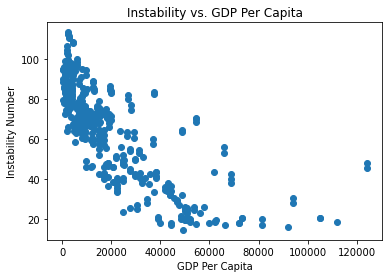

In [191]:


plt.xlabel("GDP Per Capita")
plt.ylabel("Instability Number")
plt.title("Instability vs. GDP Per Capita") 
plt.scatter(df_1["Country Comparison :: GDP - per capita (PPP)"], df_1["Instability_Num"])

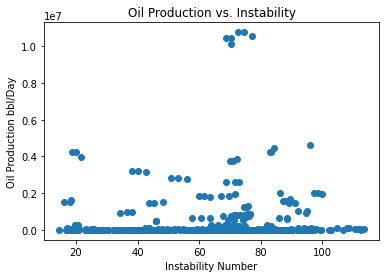

In [201]:
#Country Comparison :: Crude oil - production
plt.ylabel("Oil Production bbl/Day")
plt.xlabel("Instability Number")
plt.title( "Oil Production vs. Instability")

plt.scatter(df_1["Instability_Num"], df_1["Country Comparison :: Crude oil - production"])

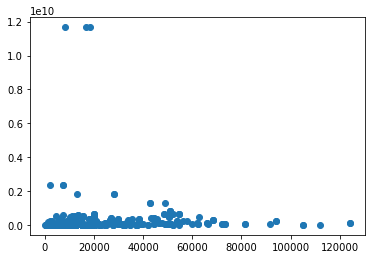

In [196]:
#Country Comparison :: Carbon dioxide emissions from consumption of energy


plt.scatter(df_1["Country Comparison :: GDP - per capita (PPP)"],df_1["Country Comparison :: Carbon dioxide emissions from consumption of energy"])

C:\Users\Ian\AppData\Local\Temp/ipykernel_36576/3334584033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["C02 Per Capita"] = df_2["Country Comparison :: Carbon dioxide emissions from consumption of energy"]/df_2["Country Comparison :: Population"]


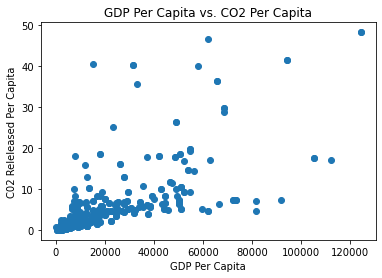

In [15]:
df_2 = df_1

plt.xlabel("GDP Per Capita")
plt.ylabel("C02 Releleased Per Capita")
plt.title("GDP Per Capita vs. CO2 Per Capita")


df_2["C02 Per Capita"] = df_2["Country Comparison :: Carbon dioxide emissions from consumption of energy"]/df_2["Country Comparison :: Population"]

plt.scatter(df_2["Country Comparison :: GDP - per capita (PPP)"],df_2["C02 Per Capita"])

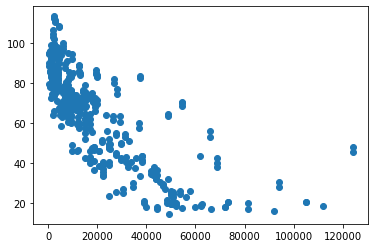

In [1638]:
plt.scatter(df_2["Country Comparison :: GDP - per capita (PPP)"],df_2["Instability_Num"])

In [ ]:
plt.scatter(df_2["Country Comparison :: GDP - per capita (PPP)"],df_2["C02 Per Capita"])

In [1695]:
pd.set_option('display.max_rows', 20)
df_1.corr()

Year  Instability_Num  \
Year                                                1.000000        -0.036476   
Instability_Num                                    -0.036476         1.000000   
Country Comparison :: Telephones - fixed lines     -0.008676        -0.093776   
Country Comparison :: Telephones - mobile cellular  0.002889         0.073009   
Country Comparison :: Internet users                0.013016         0.023187   
...                                                      ...              ...   
Country Comparison :: Roadways                      0.001231        -0.066235   
Country Comparison :: Waterways                    -0.001948         0.053517   
Country Comparison :: Merchant marine               0.001973        -0.134083   
Country Comparison :: GDP (purchasing power par... -0.050746        -0.074632   
Instability                                        -0.028567         0.959687   

                                                    Country Comparison :: Telephones - fixed lines  \
Year                                                                                     -0.008676   
Instability_Num                                                                          -0.093776   
Country Comparison :: Telephones - fixed lines                                            1.000000   
Country Comparison :: Telephones - mobile cellular                                        0.789780   
Country Comparison :: Internet users                                                      0.888127   
...                                                                                            ...   
Country Comparison :: Roadways                                                            0.778552   
Country Comparison :: Waterways                                                           0.700263   
Country Comparison :: Merchant marine                                                     0.417659   
Country Comparison :: GDP (purchasing power par...                                        0.924011   
Instability                                                                              -0.104965   

                                                    Country Comparison :: Telephones - mobile cellular  \
Year                                                                                         0.002889    
Instability_Num                                                                              0.073009    
Country Comparison :: Telephones - fixed lines                                               0.789780    
Country Comparison :: Telephones - mobile cellular                                           1.000000    
Country Comparison :: Internet users                                                         0.971602    
...                                                                                               ...    
Country Comparison :: Roadways                                                               0.926902    
Country Comparison :: Waterways                                                              0.668123    
Country Comparison :: Merchant marine                                                        0.437489    
Country Comparison :: GDP (purchasing power par...                                           0.856188    
Instability                                                                                  0.050997    

                                                    Country Comparison :: Internet users  \
Year                                                                            0.013016   
Instability_Num                                                                 0.023187   
Country Comparison :: Telephones - fixed lines                                  0.888127   
Country Comparison :: Telephones - mobile cellular                              0.971602   
Country Comparison :: Internet users                                            1.000000   
...                              

In [61]:
#SVM
from sklearn import svm
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.3673

In [1577]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [ ]:
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()



In [62]:
lasso.coef_

# high gdp per cap is stabilising 
# high gdp is actually slightly destabilizing 
# Countries with a large population but low GDP per cap can have high gdp and high instability
# Contries with small rich populations may have low gdp but high gdp per cap and low instability 

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.88419872e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.52957111e-03, -2.36904751e-03, -9.69649786e-03,
        5.02729087e-04,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -6.51957197e-12,  0.00000000e+00,  0.00000000e+00,
        1.02185532e-03,  0.00000000e+00, -0.00000000e+00, -5.60090436e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.24774099e-07,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.82357995e-12,  2.74509884e-12,
        2.14242394e-14, -0.00000000e+00,  0.00000000e+00, -3.67867745e-02,
       -0.00000000e+00, -0.00000000e+00, -8.95762152e-03, -5.05926918e-03,
       -0.00000000e+00,  6.19604714e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [154]:
pd.set_option('display.max_rows', 20)
x_data

Country Comparison :: Telephones - fixed lines  \
0              2362602.0                              
1               134636.0                              
2               242859.0                              
3               451571.0                              
4               124726.0                              
..                   ...                              
145            3658005.0                              
146            1253287.0                              
147            2024730.0                              
148              96719.0                              
149             265734.0                              

     Country Comparison :: Telephones - mobile cellular  \
0             19602815.0                                  
1             22580071.0                                  
2              2630076.0                                  
3              3618747.0                                  
4             14830154.0                                  
..                   ...                                  
145          136230406.0                                  
146           16158028.0                                  
147           96972459.0                                  
148           17220607.0                                  
149           13195902.0                                  

     Country Comparison :: Internet users  \
0              9550945.0                    
1              4717013.0                    
2              2196613.0                    
3              1966942.0                    
4              4353033.0                    
..                   ...                    
145           68267875.0                    
146            7659884.0                    
147           31107064.0                    
148            2351646.0                    
149            3796618.0                    

     Country Comparison :: Broadband - fixed subscriptions  \
0              3045957.0                                     
1                19683.0                                     
2               436192.0                                     
3               385704.0                                     
4               119068.0                                     
..                   ...                                     
145           14802380.0                                     
146             386330.0                                     
147            1250356.0                                     
148              88891.0                                     
149             204424.0                                     

     Country Comparison :: GDP real growth rate  \
0                   0.80                          
1                   2.70                          
2                   2.24                          
3                   7.50                          
4                  -2.50                          
..                   ...                          
145                 6.80                          
146                -5.90                          
147                 0.06                          
148                 3.40                          
149                 3.70                          

     Country Comparison :: GDP - per capita (PPP)  \
0                67119.0                            
1                 2065.0                            
2                13965.0                            
3                13654.0                            
4                 6670.0                            
..                   ...                            
145               8041.0                            
146               2500.0                            
147              12482.0                            
148               3470.0                            
149               2836.0                            

     Country Comparison :: Gross national saving  \
0                   28.5                       

In [ ]:
#Year 	Instability_Num 	Country Comparison :: Telephones - fixed lines 	Country Comparison :: Telephones - mobile cellular 	Country Comparison :: Internet users 	Country Comparison :: Broadband - fixed subscriptions 	Country Comparison :: GDP real growth rate 	Country Comparison :: GDP - per capita (PPP) 	Country Comparison :: Gross national saving 	Country Comparison :: Industrial production growth rate 	Country Comparison :: Labor force 	Country Comparison :: Unemployment rate 	Country Comparison :: Taxes and other revenues 	Country Comparison :: Budget surplus (+) or deficit (-) 	Country Comparison :: Public debt 	Country Comparison :: Inflation rate (consumer prices) 	Country Comparison :: Current account balance 	Country Comparison :: Exports 	Country Comparison :: Imports 	Country Comparison :: Reserves of foreign exchange and gold 	Country Comparison :: Debt - external 	Country Comparison :: Electricity - production 	Country Comparison :: Electricity - consumption 	Country Comparison :: Electricity - exports 	Country Comparison :: Electricity - imports 	Country Comparison :: Electricity - installed generating capacity 	Country Comparison :: Electricity - from fossil fuels 	Country Comparison :: Electricity - from nuclear fuels 	Country Comparison :: Electricity - from hydroelectric plants 	Country Comparison :: Electricity - from other renewable sources 	Country Comparison :: Crude oil - production 	Country Comparison :: Crude oil - exports 	Country Comparison :: Crude oil - imports 	Country Comparison :: Crude oil - proved reserves 	Country Comparison :: Refined petroleum products - production 	Country Comparison :: Refined petroleum products - consumption 	Country Comparison :: Refined petroleum products - exports 	Country Comparison :: Refined petroleum products - imports 	Country Comparison :: Natural gas - production 	Country Comparison :: Natural gas - consumption 	Country Comparison :: Natural gas - exports 	Country Comparison :: Natural gas - imports 	Country Comparison :: Natural gas - proved reserves 	Country Comparison :: Carbon dioxide emissions from consumption of energy 	Country Comparison :: Area 	Country Comparison :: Population 	Country Comparison :: Median age 	Country Comparison :: Population growth rate 	Country Comparison :: Birth rate 	Country Comparison :: Death rate 	Country Comparison :: Net migration rate 	Country Comparison :: Maternal mortality rate 	Country Comparison :: Infant mortality rate 	Country Comparison :: Total fertility rate 	Country Comparison :: Obesity - adult prevalence rate 	Country Comparison :: Airports 	Country Comparison :: Railways 	Country Comparison :: Roadways 	Country Comparison :: Waterways 	Country Comparison :: Merchant marine 	Country Comparison :: GDP (purchasing power parity) 	Instability

# Can I save the original Work??


In [425]:
# adding dummy variables 
#nato = "Belgium","Bulgaria","Canada","Croatia","Czech Republic","Denmark","Estonia","France","Germany","Greece","Hungary","Iceland","Italy","Latvia","Lithuania","Luxembourg","Montenegro","Netherlands","North Macedonia","Norway","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Turkey","United Kingdom", "United States"

#main["NATO"] = 0
#main["NATO"] = 1

#df.loc[df['month'].isin(some_list), 'x'] = 99

#main.loc[main["name"].isin(nato), "NATO"] = 1


In [134]:
# nope...............
file_list=["C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\communications.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\economy.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\electricity.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\environment_geography.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\naturalgas.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\oil_and_petroleum.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\people.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\transportation_military.csv"]

tem_2021 = pd.DataFrame(pd.read_csv(file_list[0]))

for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    #data = data[["name", "value"]]
    d = pd.DataFrame(data)
    tem_2021 = reduce(lambda  left,right: pd.merge(tem_2021,d,on=['name'], how='outer'), file_list) # using inner generates 80 contries and 37 columns, outer has over 258 countries
    
tem_2021 = tem_2021.iloc[:200,:] 

tem_2021 = tem_2021.loc[:, ~tem_2021.columns.str.endswith('rank')]


##########################

file_list_b=["C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\Railways.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\Roadways.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\Waterways.csv",
           "C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\CIA 2021\\Area.csv"]


tem_2021_b = pd.DataFrame(pd.read_csv(file_list_b[0]))
tem_2021_b=tem_2021_b[["name", "value"]]

for i in range(1,len(file_list_b)):
    data = pd.read_csv(file_list_b[i])
    data = data[["name", "value"]]
    d = pd.DataFrame(data)
    tem_2021_b = reduce(lambda  left,right: pd.merge(tem_2021_b,d,on=['name'], how='outer'), file_list_b) # using inner generates 80 contries and 37 columns, outer has over 258 countries
    
tem_2021_b = tem_2021_b.iloc[:200,:] 

tem_2021_b = pd.DataFrame(tem_2021_b)

########################
tem_2021_b.columns = ["name", "Railways", "Roadways", "Waterways", "Area"]
tem_2021 = pd.merge(tem_2021,tem_2021_b,on=['name'], how='outer')
tem_2021 = tem_2021.iloc[:200,:]


########################

pd.set_option('display.max_columns', None)

# not in 2021 ""Country Comparison :: Carbon dioxide emissions from consumption of energy"

Dict ={"name": "Country","num_tel_fix":"Country Comparison :: Telephones - fixed lines", "num_mob_fix":"Country Comparison :: Telephones - mobile cellular", "num_int_use":"Country Comparison :: Internet users", "num_broad_use":"Country Comparison :: Broadband - fixed subscriptions", "gdp_perc_growth":"Country Comparison :: GDP real growth rate", "gdp_per_cap":"Country Comparison :: GDP - per capita (PPP)","gross_nat_sav_perc":"Country Comparison :: Gross national saving", "indust_prod_gr_rate":"Country Comparison :: Industrial production growth rate", "labor_force":"Country Comparison :: Labor force", "unemp_rate":"Country Comparison :: Unemployment rate", "tax_collec_as_per_of_gdp":"Country Comparison :: Taxes and other revenues", "budg_sur_or_def":"Country Comparison :: Budget surplus (+) or deficit (-)", "pub_debt":"Country Comparison :: Public debt", "infl_rate":"Country Comparison :: Inflation rate (consumer prices)", "acc_bal":"Country Comparison :: Current account balance", "exports":"Country Comparison :: Exports", "imports":"Country Comparison :: Imports", "res_gold_forex":"Country Comparison :: Reserves of foreign exchange and gold","debt_ext":"Country Comparison :: Debt - external", "elec_prod_kWh":"Country Comparison :: Electricity - production", "elec_consum_kWh":"Country Comparison :: Electricity - consumption", "elec_exp_kWh":"Country Comparison :: Electricity - exports", "elec_imp_kWh":"Country Comparison :: Electricity - imports", "elec_gen_cap_kWh":"Country Comparison :: Electricity - installed generating capacity", "perc_from_foss_fuel":"Country Comparison :: Electricity - from fossil fuels", "perc_from_nuc_fuel":"Country Comparison :: Electricity - from nuclear fuels", "perc_from_hyd_plant":"Country Comparison :: Electricity - from hydroelectric plants", "perc_from_other":"Country Comparison :: Electricity - from other renewable sources", "oil_prod_bbl_day":"Country Comparison :: Crude oil - production", "oil_exp_bbl_day":"Country Comparison :: Crude oil - exports", "oil_imp_bbl_day":"Country Comparison :: Crude oil - imports", "oil_res_bbl":"Country Comparison :: Crude oil - proved reserves", "petr_prod_bbl":"Country Comparison :: Refined petroleum products - production", "petr_cons_bbl":"Country Comparison :: Refined petroleum products - consumption", "petr_exp_bbl":"Country Comparison :: Refined petroleum products - exports", "petr_imp_bbl":"Country Comparison :: Refined petroleum products - imports", "nat_gas_prod_cu_m":"Country Comparison :: Natural gas - production", "nat_gas_con_cu_m":"Country Comparison :: Natural gas - consumption", "nat_gas_exp_cu_m":"Country Comparison :: Natural gas - exports", "nat_gas_imp_cu_m":"Country Comparison :: Natural gas - imports", "nat_gas_res_cu_m":"Country Comparison :: Natural gas - proved reserves", "pop":"Country Comparison :: Population", "med_age":"Country Comparison :: Median age", "pop_growth_rate":"Country Comparison :: Population growth rate", "birth_rate":"Country Comparison :: Birth rate", "death_rate":"Country Comparison :: Death rate", "migr_rate":"Country Comparison :: Net migration rate", "matern_mort_rate":"Country Comparison :: Maternal mortality rate", "infant_mort_rate":"Country Comparison :: Infant mortality rate", "fert":"Country Comparison :: Total fertility rate", "obes_rate":"Country Comparison :: Obesity - adult prevalence rate", "num_airports":"Country Comparison :: Airports", "all_comm_ships":"Country Comparison :: Merchant marine", "real_gdp":"Country Comparison :: GDP (purchasing power parity)", "Area_y":"Country Comparison :: Area","Roadways":"Country Comparison :: Roadways", "Waterways":"Country Comparison :: Waterways", "Railways":"Country Comparison :: Railways", "Area":"Country Comparison :: Area"}

tem_2021.rename(columns=Dict, inplace=True)

#
tem_2021["Year"] = 2021

# Subset
tem_2021= tem_2021[["Country", "Year", "Country Comparison :: Telephones - fixed lines", "Country Comparison :: Telephones - mobile cellular", "Country Comparison :: Internet users", "Country Comparison :: Broadband - fixed subscriptions", "Country Comparison :: GDP real growth rate", "Country Comparison :: GDP - per capita (PPP)", "Country Comparison :: Gross national saving", "Country Comparison :: Industrial production growth rate", "Country Comparison :: Labor force", "Country Comparison :: Unemployment rate", "Country Comparison :: Taxes and other revenues", "Country Comparison :: Budget surplus (+) or deficit (-)", "Country Comparison :: Public debt", "Country Comparison :: Inflation rate (consumer prices)", "Country Comparison :: Current account balance", "Country Comparison :: Exports", "Country Comparison :: Imports", "Country Comparison :: Reserves of foreign exchange and gold", "Country Comparison :: Debt - external", "Country Comparison :: Electricity - production", "Country Comparison :: Electricity - consumption", "Country Comparison :: Electricity - exports", "Country Comparison :: Electricity - imports", "Country Comparison :: Electricity - installed generating capacity", "Country Comparison :: Electricity - from fossil fuels", "Country Comparison :: Electricity - from nuclear fuels", "Country Comparison :: Electricity - from hydroelectric plants", "Country Comparison :: Electricity - from other renewable sources", "Country Comparison :: Crude oil - production", "Country Comparison :: Crude oil - exports", "Country Comparison :: Crude oil - imports", "Country Comparison :: Crude oil - proved reserves", "Country Comparison :: Refined petroleum products - production", "Country Comparison :: Refined petroleum products - consumption", "Country Comparison :: Refined petroleum products - exports", "Country Comparison :: Refined petroleum products - imports", "Country Comparison :: Natural gas - production", "Country Comparison :: Natural gas - consumption", "Country Comparison :: Natural gas - exports", "Country Comparison :: Natural gas - imports", "Country Comparison :: Natural gas - proved reserves", "Country Comparison :: Area", "Country Comparison :: Population", "Country Comparison :: Median age", "Country Comparison :: Population growth rate", "Country Comparison :: Birth rate", "Country Comparison :: Death rate", "Country Comparison :: Net migration rate", "Country Comparison :: Maternal mortality rate", "Country Comparison :: Infant mortality rate", "Country Comparison :: Total fertility rate", "Country Comparison :: Obesity - adult prevalence rate", "Country Comparison :: Airports", "Country Comparison :: Railways", "Country Comparison :: Roadways", "Country Comparison :: Waterways", "Country Comparison :: Merchant marine", "Country Comparison :: GDP (purchasing power parity)"]]

# Fixing waterways 
tem_2021["Country Comparison :: Waterways"].fillna(value = 0, inplace = True)

#Fixing rail roads
tem_2021["Country Comparison :: Railways"].fillna(value = 0, inplace = True)

#Fixing Merchant Marine
tem_2021["Country Comparison :: Merchant marine"].fillna(value = 0, inplace = True)

# Filling Roads
tem_2021["Country Comparison :: Roadways"].fillna(value = 0, inplace = True)

# Uggly fix for samoa and Somalia
tem_2021["Country Comparison :: Gross national saving"].fillna(value = 0, inplace = True)

# Country Comparison :: Natural gas - proved reserves
tem_2021["Country Comparison :: Natural gas - proved reserves"].fillna(value = 0, inplace = True)


tem_2021.iloc[:,2:] = tem_2021.iloc[:,2:].replace( '[\$,)]','', regex=True ).astype(float)

# Burundi
tem_2021.at["Burundi", "Country Comparison :: Unemployment rate"] = 1.6 # 2014
# Oman
tem_2021.at["Oman", "Country Comparison :: Unemployment rate"] = 2.9 # 2020
# Somalia
tem_2021.at["Somalia", "Country Comparison :: Unemployment rate"] = 18.8 # 2019
# Chad
tem_2021.at["Chad", "Country Comparison :: Unemployment rate"] =  1.1 # 2018

C:\Users\Ian\AppData\Local\Temp/ipykernel_23248/981380146.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  tem_2021_b = reduce(lambda  left,right: pd.merge(tem_2021_b,d,on=['name'], how='outer'), file_list_b) # using inner generates 80 contries and 37 columns, outer has over 258 countries


In [135]:
# Manually adding unemployment rate from 2021
#https://data.worldbank.org/indicator/SI.POV.GINI


# fragility 
frag_2021 = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\fsi-2021.csv",encoding = 'latin1')

frag_2021 = frag_2021[["Country","Total"]]

frag_2021.rename(columns={"Total":"Instability_Num"}, inplace = True)

tem_2021 = pd.merge(frag_2021,tem_2021,on=['Country'], how="inner")

# Quintile (preforming better..)
result = []
for i in tem_2021["Instability_Num"]:
    if i >100:
        result.append(5)
    elif i>75:
         result.append(4)
    elif i>50:
         result.append(3)
    elif i>25:
         result.append(2)
    elif i>0:
         result.append(1)
tem_2021["Instability"] = result 



tem_2021pg = tem_2021
tem_2021 =tem_2021.dropna() #.fillna(0)

df_3 = tem_2021.append(df_2)
df_3 = df_3.iloc[:, :-4]

In [108]:
df_3

Country  Instability_Num    Year  \
0                               Yemen            111.7  2021.0   
2                               Syria            110.7  2021.0   
4            Central African Republic            107.0  2021.0   
5                               Sudan            105.2  2021.0   
6                         Afghanistan            102.1  2021.0   
...                               ...              ...     ...   
(2018, 149)                   Iceland             20.3  2018.0   
(2018, 150)                   Denmark             19.8  2018.0   
(2018, 151)               Switzerland             19.2  2018.0   
(2018, 152)                    Norway             18.3  2018.0   
(2018, 153)                   Finland             17.9  2018.0   

             Country Comparison :: Telephones - fixed lines  \
0                                                 1253287.0   
2                                                 2843103.0   
4                                                    2934.0   
5                                                  137842.0   
6                                                  134636.0   
...                                                     ...   
(2018, 149)                                        146213.0   
(2018, 150)                                       1439695.0   
(2018, 151)                                       3672500.0   
(2018, 152)                                        745182.0   
(2018, 153)                                        378200.0   

             Country Comparison :: Telephones - mobile cellular  \
0                                                   16158028.0    
2                                                   21115000.0    
4                                                    1595294.0    
5                                                   33014160.0    
6                                                   22580071.0    
...                                                        ...    
(2018, 149)                                           410662.0    
(2018, 150)                                          6978348.0    
(2018, 151)                                         11292000.0    
(2018, 152)                                          5721255.0    
(2018, 153)                                          7307800.0    

             Country Comparison :: Internet users  \
0                                       7659884.0   
2                                       6077510.0   
4                                        249336.0   
5                                      13311404.0   
6                                       4717013.0   
...                                           ...   
(2018, 149)                              329967.0   
(2018, 150)                             5424169.0   
(2018, 151)                             7312744.0   
(2018, 152)                             5122904.0   
(2018, 153)                             4822132.0   

             Country Comparison :: Broadband - fixed subscriptions  \
0                                                     386330.0       
2                                                    1490344.0       
4                                                        499.0       
5                                                      32762.0       
6                                                      19683.0       
...                                                        ...       
(2018, 149)                                           133574.0       
(2018, 150)                                          2475382.0       
(2018, 151)                                          3850000.0       
(2018, 152)                                          2134105.0       
(2018, 153)                                          1709400.0       

             Country Comparison :: GDP real growth rate  \
0                                                  -5.9   
2                                                 -36.5   
4                   

In [136]:
###################
# Test Train Split#
###################


X = df_3.iloc[:, 3:61] 
y = df_3["Instability"]

# Split the dataset
X_train, X_test, y_train, y_test = tts(X, y, train_size=.75)

In [211]:
# K- Fold LASSO

#data = df_3.values
X, y = df_3.iloc[:, 3:61] , df_3["Instability"]
# define model
model = Lasso(normalize=True)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('R-Squared: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R-Squared: -0.381
Config: {'alpha': 0.0}


C:\Users\Ian\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Ian\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ian\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.351103644468886, tolerance: 0.05843839590443686
  model = cd_fast.enet_coordinate_descent(


In [21]:
#importing lasso

lasso = Lasso(alpha = c) # bes alpha for df_2


# training data
lasso_reg = lasso.fit(X_train, y_train) 

# R^2
lasso.score(X_test,y_test)
round(lasso.score(X_test,y_test), 4)

NameError: name 'c' is not defined

In [54]:
lasso.coef_

array([ 1.64039560e-08, -4.60466575e-10,  1.69188262e-09, -5.15900281e-10,
       -8.24964744e-03, -1.18297768e-05, -3.47223802e-03,  3.62884914e-03,
       -6.62581522e-09,  2.42566302e-03, -6.02283298e-03, -8.80349290e-03,
        4.69942561e-04, -5.16791658e-07, -3.33458119e-12, -6.21907719e-13,
        1.41403227e-13, -8.92718026e-14, -6.16300441e-14, -1.30788595e-12,
       -3.17225529e-13,  4.70605983e-12, -3.16014792e-12,  1.90809224e-09,
       -7.66323301e-03, -1.80922863e-03, -8.83839039e-03, -1.53072487e-02,
        1.44653553e-07, -1.55094110e-07, -1.86009427e-07, -2.55358592e-13,
        1.03286143e-06, -2.99354386e-07, -3.63795770e-07,  2.61289871e-07,
       -8.65321083e-13, -5.04752128e-12, -1.30601398e-12,  1.44606907e-11,
        1.06871586e-14,  6.77877983e-08,  5.12521752e-09, -7.20208134e-02,
        0.00000000e+00, -3.26779546e-03,  2.56297369e-02,  6.83733181e-04,
        4.89129109e-05,  4.80908754e-03, -2.09449819e-01, -5.95032768e-03,
       -3.42055918e-04, -

In [60]:
# K-fold Ridge

#data = df_1.values
X, y = df_3.iloc[:, 3:61] , df_3["Instability"]
# define model
model = Ridge(normalize=True)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('R -Squared: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R -Squared: 0.768
Config: {'alpha': 0.037}


In [137]:
# Ridge Regression

ridge = Ridge(normalize=True,alpha=0.037)

#ridge.fit(X_train, y_train)
ridge_reg = ridge.fit(X_train, y_train) 
ridge.score(X_test, y_test)

# you should use cross validation on this 

# the error message is telling you that there are two values that are very similar

0.753019396350385

In [55]:
ridge.coef_

array([ 5.31184829e-09,  3.64541889e-10,  8.65966343e-10, -6.66567242e-10,
       -1.00951778e-02, -1.51555143e-05, -2.21419290e-03,  6.67039153e-03,
        1.31630815e-10,  4.81956023e-03, -7.26548368e-03, -8.54209832e-03,
        7.35870434e-04,  5.44506325e-08, -1.13811821e-12, -3.24142716e-13,
       -2.36476430e-13, -1.35045451e-13, -1.38469482e-14, -8.65564690e-14,
       -1.20695990e-13, -3.50677860e-12, -6.23686455e-13, -2.22306307e-10,
        6.78614922e-04,  3.05699580e-03,  1.43313245e-05, -5.68912896e-03,
        8.29926503e-08, -8.47935724e-08,  1.99356540e-08,  3.03765509e-13,
        8.37139701e-08, -1.13483622e-08,  1.58209868e-07, -1.10671327e-07,
       -7.70612326e-13,  6.93749303e-13, -1.58580288e-12,  1.04721410e-11,
        1.18242560e-14, -5.55199856e-09,  5.35578603e-10, -3.59322403e-02,
        6.40489274e-03,  4.41779757e-03, -9.32856796e-03, -3.36507968e-03,
        1.54731755e-04,  7.62927796e-03, -1.05909342e-01, -3.61323099e-03,
       -5.17999042e-05, -

In [215]:
from sklearn.linear_model import RidgeClassifierCV
#X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)

0.23208191126279865

In [109]:
df_3.describe()

Instability_Num         Year  \
count       586.000000   586.000000   
mean         64.886007  2019.532423   
std          23.470380     1.123094   
min          14.600000  2018.000000   
25%          47.000000  2019.000000   
50%          69.800000  2020.000000   
75%          82.400000  2021.000000   
max         113.500000  2021.000000   

       Country Comparison :: Telephones - fixed lines  \
count                                    5.860000e+02   
mean                                     5.349927e+06   
std                                      1.789866e+07   
min                                      0.000000e+00   
25%                                      1.461095e+05   
50%                                      7.432255e+05   
75%                                      3.193131e+06   
max                                      1.937620e+08   

       Country Comparison :: Telephones - mobile cellular  \
count                                       5.860000e+02    
mean                                        4.933394e+07    
std                                         1.668338e+08    
min                                         6.261000e+03    
25%                                         3.782000e+06    
50%                                         1.067715e+07    
75%                                         3.432493e+07    
max                                         1.746238e+09    

       Country Comparison :: Internet users  \
count                          5.860000e+02   
mean                           2.173562e+07   
std                            7.197391e+07   
min                            5.850800e+04   
25%                            1.493382e+06   
50%                            4.769039e+06   
75%                            1.538520e+07   
max                            7.518861e+08   

       Country Comparison :: Broadband - fixed subscriptions  \
count                                       5.860000e+02       
mean                                        6.173943e+06       
std                                         3.379230e+07       
min                                         4.990000e+02       
25%                                         7.041075e+04       
50%                                         5.331075e+05       
75%                                         3.142352e+06       
max                                         4.492790e+08       

       Country Comparison :: GDP real growth rate  \
count                                  586.000000   
mean                                     3.280904   
std                                      6.539850   
min                                    -36.500000   
25%                                      1.600000   
50%                                      3.000000   
75%                                      4.900000   
max                                     64.000000   

       Country Comparison :: GDP - per capita (PPP)  \
count                                    586.000000   
mean                                   20068.581911   
std                                    21329.626296   
min                                      175.000000   
25%                                     4713.500000   
50%                                    12500.000000   
75%                                    27875.000000   
max                                   124100.000000   

       Country Comparison :: Gross national saving  \
count                                   586.000000   
mean                                     21.533788   
std                                      10.885358   
min                                     -58.300000   
25%                                      15.300000   
50%                                      21.500000   
75%                                      27.800000   
max                                      50.200000   

       Country Comparison :: Industrial production growth rate  \
count                                         586.000000       

In [ ]:
#from sklearn.metrics import f1_score
#f1_score(y_true, y_pred, average = None)

In [110]:
# 2021 prediction
X = df_3.iloc[:, 3:61] 
y = df_3["Instability"]

# Split the dataset
X_train, X_test, y_train, y_test = tts(X, y, train_size=.75)

# Ridge Regression

ridge = Ridge(normalize=True,alpha=0.037)

#ridge.fit(X_train, y_train)
ridge_reg = ridge.fit(X_train, y_train) 
ridge.score(X_test, y_test)

# you should use cross validation on this 

# the error message is telling you that there are two values that are very similar
#lasso.coef_
#.summary()

0.8060760426152855

In [111]:
df_3["Prediction"] = np.round(ridge_reg.predict(X))
# SGD Dataset
df_SGD = df_3

In [113]:

    
# GDP Per Cap Drop
df_SGD["Country Comparison :: GDP - per capita (PPP)"] = df_SGD["Country Comparison :: GDP - per capita (PPP)"]*.5

# GDP Drop
df_SGD["Country Comparison :: GDP (purchasing power parity)"] = df_SGD["Country Comparison :: GDP (purchasing power parity)"]*.5

#Unemployment
df_SGD["Country Comparison :: Unemployment rate"] = df_SGD["Country Comparison :: Unemployment rate"]*4

#2/3 Drop in Imports
df_SGD["Country Comparison :: Imports"] = df_SGD["Country Comparison :: Imports"]*.66

# 2/3 Drop in Exports
df_SGD["Country Comparison :: Exports"] = df_SGD["Country Comparison :: Exports"]*.66

# Debt increases 1/3
df_SGD["Country Comparison :: Public debt"] = df_SGD["Country Comparison :: Public debt"]*1.33



##############################
###### This isn't working for some reason

for i in df_SGD["Country Comparison :: GDP real growth rate"]:
    if i < 0:
        df_SGD["Country Comparison :: GDP real growth rate"] = df_SDG["Country Comparison :: GDP real growth rate"]*2
    elif i > 0:
        df_SGD["Country Comparison :: GDP real growth rate"]= df_SDG["Country Comparison :: GDP real growth rate"]*-1
                 
# Prediction

#df_SGD  = df_SGD.drop(['Instability_Num',"Country Comparison :: Carbon dioxide emissions from consumption of energy"], axis=1)

X = df_SGD.iloc[:, 2:60] 

df_SGD["Prediction"] = np.round(ridge_reg.predict(X))

df_SGD

Country  Instability_Num    Year  \
0                               Yemen            111.7  2021.0   
2                               Syria            110.7  2021.0   
4            Central African Republic            107.0  2021.0   
5                               Sudan            105.2  2021.0   
6                         Afghanistan            102.1  2021.0   
...                               ...              ...     ...   
(2018, 149)                   Iceland             20.3  2018.0   
(2018, 150)                   Denmark             19.8  2018.0   
(2018, 151)               Switzerland             19.2  2018.0   
(2018, 152)                    Norway             18.3  2018.0   
(2018, 153)                   Finland             17.9  2018.0   

             Country Comparison :: Telephones - fixed lines  \
0                                                 1253287.0   
2                                                 2843103.0   
4                                                    2934.0   
5                                                  137842.0   
6                                                  134636.0   
...                                                     ...   
(2018, 149)                                        146213.0   
(2018, 150)                                       1439695.0   
(2018, 151)                                       3672500.0   
(2018, 152)                                        745182.0   
(2018, 153)                                        378200.0   

             Country Comparison :: Telephones - mobile cellular  \
0                                                   16158028.0    
2                                                   21115000.0    
4                                                    1595294.0    
5                                                   33014160.0    
6                                                   22580071.0    
...                                                        ...    
(2018, 149)                                           410662.0    
(2018, 150)                                          6978348.0    
(2018, 151)                                         11292000.0    
(2018, 152)                                          5721255.0    
(2018, 153)                                          7307800.0    

             Country Comparison :: Internet users  \
0                                       7659884.0   
2                                       6077510.0   
4                                        249336.0   
5                                      13311404.0   
6                                       4717013.0   
...                                           ...   
(2018, 149)                              329967.0   
(2018, 150)                             5424169.0   
(2018, 151)                             7312744.0   
(2018, 152)                             5122904.0   
(2018, 153)                             4822132.0   

             Country Comparison :: Broadband - fixed subscriptions  \
0                                                     386330.0       
2                                                    1490344.0       
4                                                        499.0       
5                                                      32762.0       
6                                                      19683.0       
...                                                        ...       
(2018, 149)                                           133574.0       
(2018, 150)                                          2475382.0       
(2018, 151)                                          3850000.0       
(2018, 152)                                          2134105.0       
(2018, 153)                                          1709400.0       

             Country Comparison :: GDP real growth rate  \
0                                         1.207063e+150   
2                                         7.467422e+150   
4                   

In [112]:
df_3

Country  Instability_Num    Year  \
0                               Yemen            111.7  2021.0   
2                               Syria            110.7  2021.0   
4            Central African Republic            107.0  2021.0   
5                               Sudan            105.2  2021.0   
6                         Afghanistan            102.1  2021.0   
...                               ...              ...     ...   
(2018, 149)                   Iceland             20.3  2018.0   
(2018, 150)                   Denmark             19.8  2018.0   
(2018, 151)               Switzerland             19.2  2018.0   
(2018, 152)                    Norway             18.3  2018.0   
(2018, 153)                   Finland             17.9  2018.0   

             Country Comparison :: Telephones - fixed lines  \
0                                                 1253287.0   
2                                                 2843103.0   
4                                                    2934.0   
5                                                  137842.0   
6                                                  134636.0   
...                                                     ...   
(2018, 149)                                        146213.0   
(2018, 150)                                       1439695.0   
(2018, 151)                                       3672500.0   
(2018, 152)                                        745182.0   
(2018, 153)                                        378200.0   

             Country Comparison :: Telephones - mobile cellular  \
0                                                   16158028.0    
2                                                   21115000.0    
4                                                    1595294.0    
5                                                   33014160.0    
6                                                   22580071.0    
...                                                        ...    
(2018, 149)                                           410662.0    
(2018, 150)                                          6978348.0    
(2018, 151)                                         11292000.0    
(2018, 152)                                          5721255.0    
(2018, 153)                                          7307800.0    

             Country Comparison :: Internet users  \
0                                       7659884.0   
2                                       6077510.0   
4                                        249336.0   
5                                      13311404.0   
6                                       4717013.0   
...                                           ...   
(2018, 149)                              329967.0   
(2018, 150)                             5424169.0   
(2018, 151)                             7312744.0   
(2018, 152)                             5122904.0   
(2018, 153)                             4822132.0   

             Country Comparison :: Broadband - fixed subscriptions  \
0                                                     386330.0       
2                                                    1490344.0       
4                                                        499.0       
5                                                      32762.0       
6                                                      19683.0       
...                                                        ...       
(2018, 149)                                           133574.0       
(2018, 150)                                          2475382.0       
(2018, 151)                                          3850000.0       
(2018, 152)                                          2134105.0       
(2018, 153)                                          1709400.0       

             Country Comparison :: GDP real growth rate  \
0                                                  -5.9   
2                                                 -36.5   
4                   

In [124]:
#df_3.to_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\grm.csv")
df_SGD.to_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\grm_sgd.csv")
main_map.to_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\main_map.csv")
tem_2021.to_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\tem_21.csv")

In [140]:
# Getting list of Pygal Countries 
pg = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\Pygal.csv",encoding = 'latin1')

# Renaming pg countries
pg.iloc[101,1] = "Libya"
pg.iloc[142,1] = "Russia"
pg.iloc[20,1] = "Bolivia"
pg.iloc[40,1] = "Czechia"
pg.iloc[79,1] = "Iran"
pg.iloc[170,1] = "Tanzania"
pg.iloc[177,1] = "Venezuela"
pg.iloc[92,1] = "Laos"
pg.iloc[178,1] = "Vietnam"
#pg.iloc[,1] =

# Subsetting countries in Pygal
main_map = pd.merge(pg,tem_2021pg,on=['Country'], how="inner")

main_map = main_map.fillna(0)
#main_map = main_map.apply(lambda col: pd.Series(col.unique()))

x_data = main_map.iloc[:, 4:62]
#x_data = x_data.fillna(0)
#x_data1 = x_data.apply(lambda col: pd.Series(col.unique()))

# Predicting 2021
# pd.set_option('display.max_rows', None)
main_map["Predict"] = np.round(ridge_reg.predict(x_data))


# 10% GDP Drop Prediction #######################################
# Getting list of Pygal Countries 
pg = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\Pygal.csv",encoding = 'latin1')

# Renaming pg countries
pg.iloc[101,1] = "Libya"
pg.iloc[142,1] = "Russia"
pg.iloc[20,1] = "Bolivia"
pg.iloc[40,1] = "Czechia"
pg.iloc[79,1] = "Iran"
pg.iloc[170,1] = "Tanzania"
pg.iloc[177,1] = "Venezuela"
pg.iloc[92,1] = "Laos"
pg.iloc[178,1] = "Vietnam"

# Subsetting countries in Pygal
main_map = pd.merge(pg,tem_2021pg,on=['Country'], how="inner")

main_map = main_map.fillna(0)
#main_map = main_map.apply(lambda col: pd.Series(col.unique()))
main_map_10 = main_map
main_map_10["Country Comparison :: GDP - per capita (PPP)"] = main_map_10["Country Comparison :: GDP - per capita (PPP)"]*.9
main_map_10["Country Comparison :: GDP (purchasing power parity)"] = main_map_10["Country Comparison :: GDP (purchasing power parity)"]*.9


x_data_10 = main_map_10.iloc[:, 4:62]
#x_data = x_data.fillna(0)
#x_data1 = x_data.apply(lambda col: pd.Series(col.unique()))

pd.set_option('display.max_rows', None)
main_map_10["Predict"] = np.round(ridge_reg.predict(x_data_10))


# 30% GDP Drop Prediction #############################################
# Getting list of Pygal Countries 
pg = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\Pygal.csv",encoding = 'latin1')

# Renaming pg countries
pg.iloc[101,1] = "Libya"
pg.iloc[142,1] = "Russia"
pg.iloc[20,1] = "Bolivia"
pg.iloc[40,1] = "Czechia"
pg.iloc[79,1] = "Iran"
pg.iloc[170,1] = "Tanzania"
pg.iloc[177,1] = "Venezuela"
pg.iloc[92,1] = "Laos"
pg.iloc[178,1] = "Vietnam"

# Subsetting countries in Pygal
main_map = pd.merge(pg,tem_2021pg,on=['Country'], how="inner")

main_map = main_map.fillna(0)
#main_map = main_map.apply(lambda col: pd.Series(col.unique()))
main_map_30 = main_map
main_map_30["Country Comparison :: GDP - per capita (PPP)"] = main_map_30["Country Comparison :: GDP - per capita (PPP)"]*.7
main_map_30["Country Comparison :: GDP (purchasing power parity)"] = main_map_30["Country Comparison :: GDP (purchasing power parity)"]*.7


x_data_30 = main_map_30.iloc[:, 4:62]
#x_data = x_data.fillna(0)
#x_data1 = x_data.apply(lambda col: pd.Series(col.unique()))

pd.set_option('display.max_rows', None)
main_map_30["Predict"] = np.round(ridge_reg.predict(x_data_30))


# 50% GDP Drop Prediction ################################################
# Great depression
    # 50% drop in gdp
    # 4x unemplyment 
    # 2/3 drop in imports and exports
    # Debt increas 1/3
    
# Getting list of Pygal Countries 
pg = pd.read_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\Pygal.csv",encoding = 'latin1')

# Renaming pg countries
pg.iloc[101,1] = "Libya"
pg.iloc[142,1] = "Russia"
pg.iloc[20,1] = "Bolivia"
pg.iloc[40,1] = "Czechia"
pg.iloc[79,1] = "Iran"
pg.iloc[170,1] = "Tanzania"
pg.iloc[177,1] = "Venezuela"
pg.iloc[92,1] = "Laos"
pg.iloc[178,1] = "Vietnam"

# Subsetting countries in Pygal
main_map = pd.merge(pg,tem_2021pg,on=['Country'], how="inner")

main_map = main_map.fillna(0)
#main_map = main_map.apply(lambda col: pd.Series(col.unique()))
main_map_50 = main_map

# GDP Per Cap Drop
main_map_50["Country Comparison :: GDP - per capita (PPP)"] = main_map_50["Country Comparison :: GDP - per capita (PPP)"]*.5

# GDP Drop
main_map_50["Country Comparison :: GDP (purchasing power parity)"] = main_map_50["Country Comparison :: GDP (purchasing power parity)"]*.5

#Unemployment
main_map_50["Country Comparison :: Unemployment rate"] = main_map_50["Country Comparison :: Unemployment rate"]*4

#2/3 Drop in Imports
main_map_50["Country Comparison :: Imports"] = main_map_50["Country Comparison :: Imports"]*.66

# 2/3 Drop in Exports
main_map_50["Country Comparison :: Exports"] = main_map_50["Country Comparison :: Exports"]*.66

# Debt increases 1/3
main_map_50["Country Comparison :: Public debt"] = main_map_50["Country Comparison :: Public debt"]*1.33

# Country Comparison :: Inflation rate (consumer prices)
#main_map_50["Country Comparison :: GDP (purchasing power parity)"] = main_map_50["Country Comparison :: GDP (purchasing power parity)"]*.5

#
#main_map_50["Country Comparison :: GDP (purchasing power parity)"] = main_map_50["Country Comparison :: GDP (purchasing power parity)"]*.5
x_data_50 = main_map_50.iloc[:, 4:62]
#x_data = x_data.fillna(0)
#x_data1 = x_data.apply(lambda col: pd.Series(col.unique()))

pd.set_option('display.max_rows', None)
main_map_50["Predict"] = np.round(ridge_reg.predict(x_data_50))

In [ ]:
#model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
#%%
#model.fit(X_train, y_train)
#%%
#y=model.predict(X_test)
#y2=model.predict(X_train)
#%% 
#from sklearn.metrics import accuracy_score
#score =accuracy_score(y, y_test)

In [ ]:
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)

# Mapping

In [47]:
#pip install pygal.maps.world

Note: you may need to restart the kernel to use updated packages.


In [141]:
# Main map True Instability 
in5 = main_map[main_map["Instability"]>=5]
in4 = main_map[main_map["Instability"]==4]
in3 = main_map[main_map["Instability"]==3]
in2 = main_map[main_map["Instability"]==2]
in1 = main_map[main_map["Instability"]<=1]
l5 = list(in5.iloc[:,0])
l4 = list(in4.iloc[:,0])
l3 = list(in3.iloc[:,0])
l2 = list(in2.iloc[:,0])
l1 = list(in1.iloc[:,0])


# Predicting Stability 2021
pr5 = main_map[main_map["Predict"]>=5]
pr4 = main_map[main_map["Predict"]==4]
pr3 = main_map[main_map["Predict"]==3]
pr2 = main_map[main_map["Predict"]==2]
pr1 = main_map[main_map["Predict"]<=1]
p5 = list(pr5.iloc[:,0])
p4 = list(pr4.iloc[:,0])
p3 = list(pr3.iloc[:,0])
p2 = list(pr2.iloc[:,0])
p1 = list(pr1.iloc[:,0])

# Predicted Stability 10% GDP Drop
pr5_10 = main_map_10[main_map_10["Predict"]>=5]
pr4_10 = main_map_10[main_map_10["Predict"]==4]
pr3_10 = main_map_10[main_map_10["Predict"]==3]
pr2_10 = main_map_10[main_map_10["Predict"]==2]
pr1_10 = main_map_10[main_map_10["Predict"]<=1]
p5_10 = list(pr5_10.iloc[:,0])
p4_10 = list(pr4_10.iloc[:,0])
p3_10 = list(pr3_10.iloc[:,0])
p2_10 = list(pr2_10.iloc[:,0])
p1_10 = list(pr1_10.iloc[:,0])


# Predicted Stability 30% GDP Drop
pr5_30 = main_map_30[main_map_30["Predict"]>=5]
pr4_30 = main_map_30[main_map_30["Predict"]==4]
pr3_30 = main_map_30[main_map_30["Predict"]==3]
pr2_30 = main_map_30[main_map_30["Predict"]==2]
pr1_30 = main_map_30[main_map_30["Predict"]<=1]
p5_30 = list(pr5_30.iloc[:,0])
p4_30 = list(pr4_30.iloc[:,0])
p3_30 = list(pr3_30.iloc[:,0])
p2_30 = list(pr2_30.iloc[:,0])
p1_30 = list(pr1_30.iloc[:,0])


# Predicted Stability (Second Great Depression)
pr5_50 = main_map_50[main_map_50["Predict"]>=5]
pr4_50 = main_map_50[main_map_50["Predict"]==4]
pr3_50 = main_map_50[main_map_50["Predict"]==3]
pr2_50 = main_map_50[main_map_50["Predict"]==2]
pr1_50 = main_map_50[main_map_50["Predict"]<=1]
p5_50 = list(pr5_50.iloc[:,0])
p4_50 = list(pr4_50.iloc[:,0])
p3_50 = list(pr3_50.iloc[:,0])
p2_50 = list(pr2_50.iloc[:,0])
p1_50 = list(pr1_50.iloc[:,0])


In [143]:
main_map_50.to_csv("C:\\Users\\Ian\\Desktop\\Global Risk Modeling\\main_map_50.csv")

In [117]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(main_map["Instability"],main_map["Predict"], labels=[5, 4, 3,2,1])

cm_df = pd.DataFrame(cm,
                     index = ['Highly Unstable','Unstable','Somewhat Unstable', "Stable", "Highly Stable"], 
                     columns = ['Highly Unstable','Unstable','Somewhat Unstable', "Stable", "Highly Stable"])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

ValueError: Must pass 2-d input. shape=(5, 2, 2)

In [226]:
cm = multilabel_confusion_matrix(main_map["Instability"],main_map["Predict"], labels=[5, 4, 3,2,1])
cm

array([[[144,   1],
        [  3,   2]],

       [[ 77,  21],
        [  9,  43]],

       [[ 79,  17],
        [ 20,  34]],

       [[110,  14],
        [ 11,  15]],

       [[136,   1],
        [ 12,   1]]], dtype=int64)

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

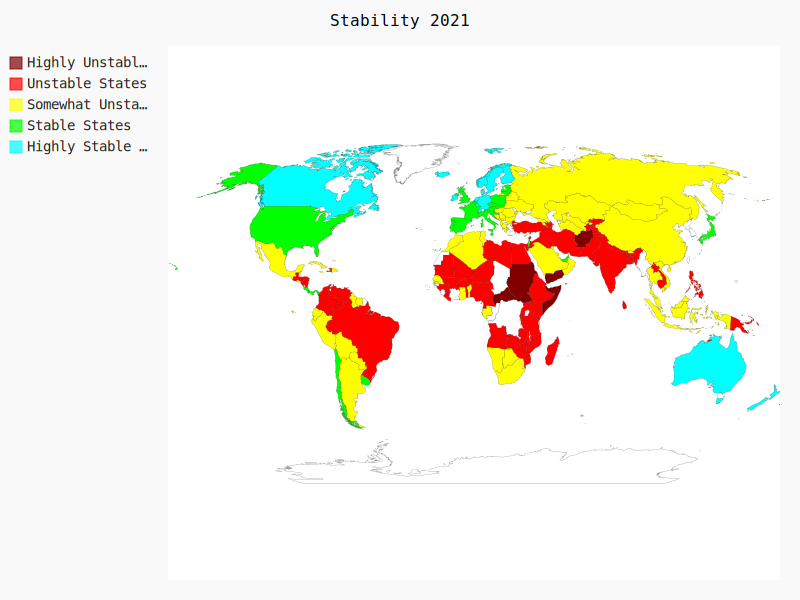

In [118]:
# Stability Map 2021

# create a Style object
custom_style = Style(colors = ("#800000"," 	#FF0000","#FFFF00","#00FF00", "#00FFFF"))
#                            
# create a world map
# Style class is used for using
# the custom colours in the map,
#worldmap =  pygal.maps.world.World(style = custom_style)
  
# set the title of the map
#worldmap.title = 'Some Countries Starting from Specific Letters'


# fix color scheme and find out why so may countries are missing (probably NaN drop)
worldmap =  pygal.maps.world.World(style = custom_style)
worldmap.title = 'Stability 2021'
worldmap.add("Highly Unstable States",l5)
worldmap.add("Unstable States",l4)
worldmap.add("Somewhat Unstable States",l3)
worldmap.add("Stable States",l2)
worldmap.add("Highly Stable States",l1)




OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

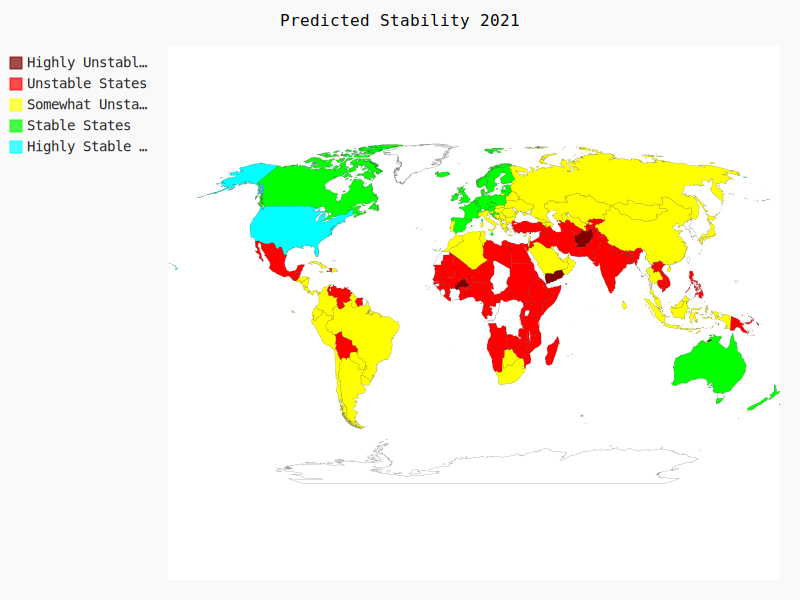

In [119]:
# Predicted Stability 2021
worldmap =  pygal.maps.world.World(style = custom_style)
worldmap.title = 'Predicted Stability 2021'
worldmap.add("Highly Unstable States",p5)
worldmap.add("Unstable States",p4)
worldmap.add("Somewhat Unstable States",p3)
worldmap.add("Stable States",p2)
worldmap.add("Highly Stable States",p1)

##########################################
# Something is off, it's predicting like a great depression now

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

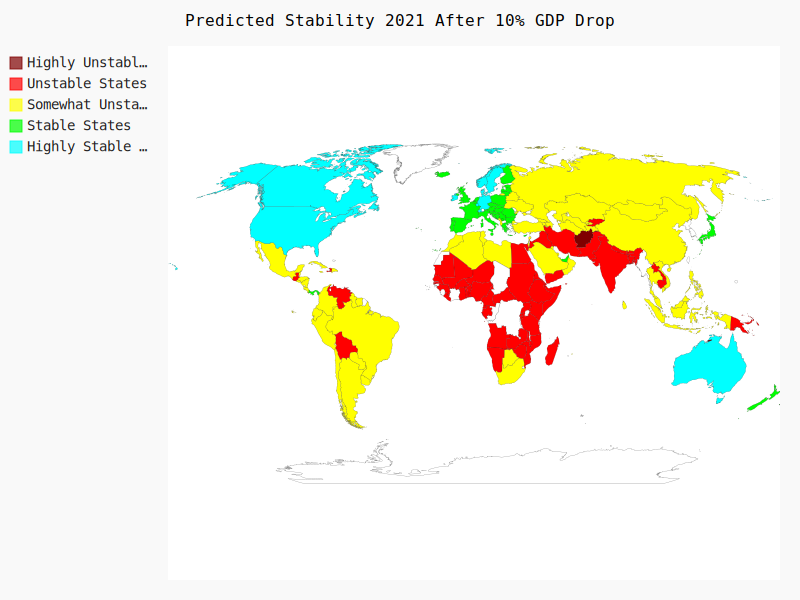

In [209]:
# Predicted Stbility After 10% GDP Drop
worldmap =  pygal.maps.world.World(style = custom_style)
worldmap.title = 'Predicted Stability 2021 After 10% GDP Drop'
worldmap.add("Highly Unstable States",p5_10)
worldmap.add("Unstable States",p4_10)
worldmap.add("Somewhat Unstable States",p3_10)
worldmap.add("Stable States",p2_10)
worldmap.add("Highly Stable States",p1_10)

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

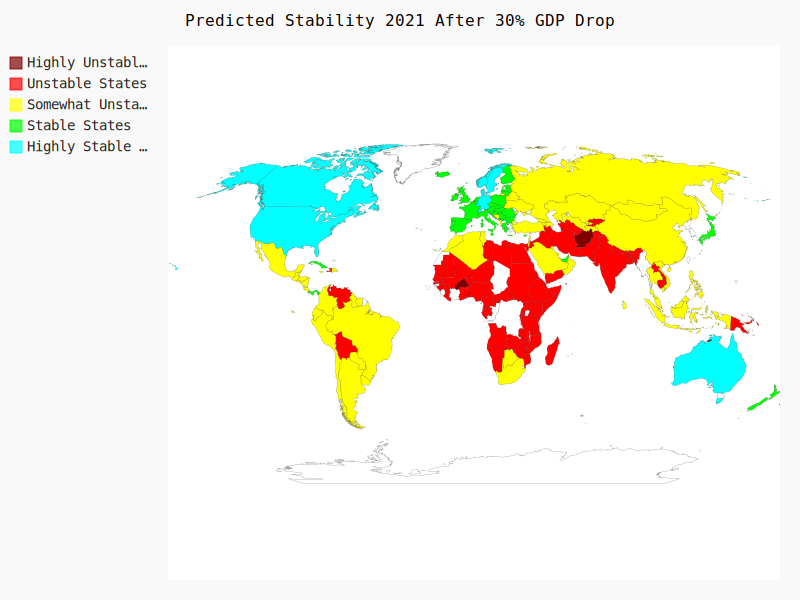

In [168]:
# Prediction Afte 30% GDP Drop
worldmap =  pygal.maps.world.World(style = custom_style)
worldmap.title = 'Predicted Stability 2021 After 30% GDP Drop'
worldmap.add("Highly Unstable States",p5_30)
worldmap.add("Unstable States",p4_30)
worldmap.add("Somewhat Unstable States",p3_30)
worldmap.add("Stable States",p2_30)
worldmap.add("Highly Stable States",p1_30)

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

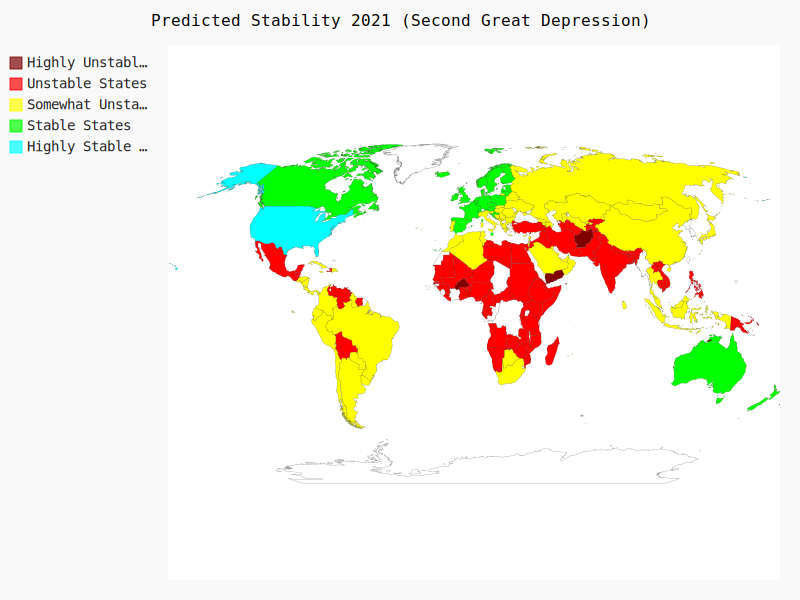

In [120]:
# Predicted Stability (Second Great Depression)
worldmap =  pygal.maps.world.World(style = custom_style)
worldmap.title = 'Predicted Stability 2021 (Second Great Depression)'
worldmap.add("Highly Unstable States",p5_50)
worldmap.add("Unstable States",p4_50)
worldmap.add("Somewhat Unstable States",p3_50)
worldmap.add("Stable States",p2_50)
worldmap.add("Highly Stable States",p1_50)

In [164]:

# create a world map
worldmap =  pg.SupranationalWorld()
  
# set the title of map
worldmap.title = 'Continents'
  
# adding the continents
worldmap.add('Africa', [('africa')])
worldmap.add('North america', [('north_america')])
worldmap.add('Oceania', [('oceania')])
worldmap.add('South america', [('south_america')])
worldmap.add('Asia', [('asia')])
worldmap.add('Europe', [('europe')])
worldmap.add('Antartica', [('antartica')])
  
# save into the file
worldmap.render_to_file('abc.svg')
  
print("Success")

Success


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

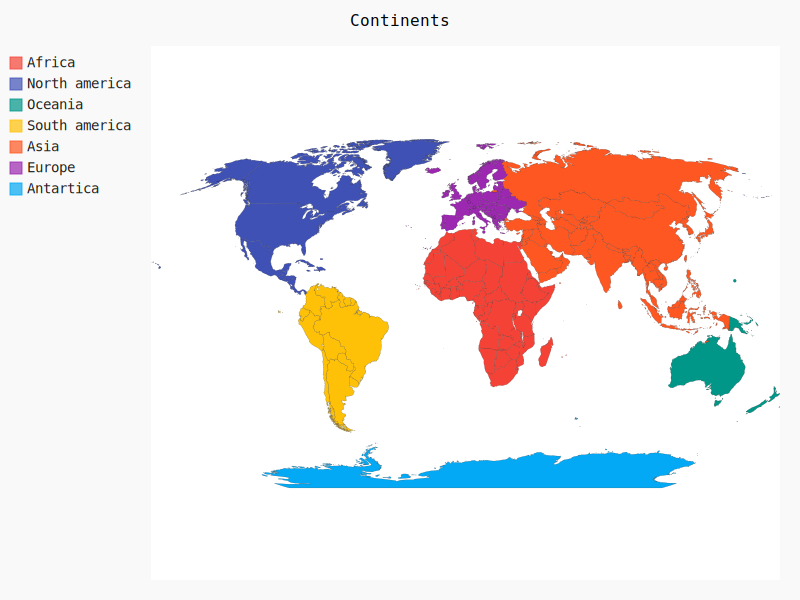

In [165]:
in5 = main_map[main_map["Instability"]>=5]
in4 = main_map[main_map["Instability"]==4]
in3 = main_map[main_map["Instability"]==3]
in2 = main_map[main_map["Instability"]==2]
in1 = main_map[main_map["Instability"]<=1]
l5 = list(in5.iloc[:,0])
l4 = list(in4.iloc[:,0])
l3 = list(in3.iloc[:,0])
l2 = list(in2.iloc[:,0])
l1 = list(in1.iloc[:,0])

In [230]:
pd.table(main_map)

AttributeError: module 'pandas' has no attribute 'table'